### Goal of Model:

***Advanced data preparation:*** Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
    
    1- Monthly average purchase and cash advance amount
    
    2- Purchases by type (one-off, installments)
    
    3- Average amount per purchase and cash advance transaction,
    
    4- Limit usage (balance to credit limit ratio),
    
    5- Payments to minimum payments ratio etc.
    
    6- Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
    
    7- Identification of the relationships/ affinities between services.
    
    8- Clustering: Apply a data reduction technique factor analysis/PCA for variable reduction technique and a clustering algorithm to reveal the behavioural segments of credit card holders
    
    9- Identify cluster characterisitics.
    
    10- Provide the strategic insights and implementation of strategies for given set of cluster characteristics

In [1]:
#from google.colab import drive

In [2]:
#drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Import Library

In [3]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import os
from fancyimpute import KNN

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

Using TensorFlow backend.


### Load data

In [5]:
credit = pd.read_csv("credit-card-data.csv")

### Information about data set

In [6]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
credit.shape

(8950, 18)

In [8]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Data Exploration and Cleaning

Replace the frequency > 1 with 1

In [9]:
credit['CASH_ADVANCE_FREQUENCY'].values[credit['CASH_ADVANCE_FREQUENCY'].values > 1] = 1

In [10]:
# Find missing value in each feature
missing_val = credit.isnull().sum().sort_values(ascending=False)
#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_Value_count'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_Value_count']/len(credit))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_Value_count,Missing_percentage
0,MINIMUM_PAYMENTS,313,3.497207
1,CREDIT_LIMIT,1,0.011173
2,PAYMENTS,0,0.000000
3,PURCHASES_TRX,0,0.000000
4,CASH_ADVANCE_TRX,0,0.000000
5,CASH_ADVANCE_FREQUENCY,0,0.000000
6,PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000
7,PRC_FULL_PAYMENT,0,0.000000
8,ONEOFF_PURCHASES_FREQUENCY,0,0.000000
9,CASH_ADVANCE,0,0.000000


---

### a) Missing Value Treatment
       - Since there are missing values in the data so we have to impute the missing value.
       - We have three option to impute the missing value (mean, median, KNN imputation)
       - To select the best method to impute the missing value 
---

In [11]:
# Remove CUST_ID (not usefull)
credit.drop("CUST_ID", axis=1, inplace=True)

In [12]:
# credit['MINIMUM_PAYMENTS'].loc[500]
# Actual = 457.255
# Mean = 1199.94
# Median = 873.09
# KNN Imputation (K=4) = 469.99

In [13]:
print(credit['MINIMUM_PAYMENTS'].loc[500])

457.25526900000006


In [14]:
credit['MINIMUM_PAYMENTS'].loc[500]=np.nan

In [15]:
#Impute with mean
#credit = credit.fillna(credit.mean())

#Impute with median
#credit = credit.fillna(credit.median())

#Apply KNN imputation algorithm
credit = pd.DataFrame(KNN(k = 4).fit_transform(credit), columns = credit.columns)


Imputing row 1/8950 with 0 missing, elapsed time: 15.246
Imputing row 101/8950 with 0 missing, elapsed time: 15.247
Imputing row 201/8950 with 0 missing, elapsed time: 15.249
Imputing row 301/8950 with 0 missing, elapsed time: 15.250
Imputing row 401/8950 with 0 missing, elapsed time: 15.251
Imputing row 501/8950 with 1 missing, elapsed time: 15.251
Imputing row 601/8950 with 0 missing, elapsed time: 15.252
Imputing row 701/8950 with 0 missing, elapsed time: 15.253
Imputing row 801/8950 with 0 missing, elapsed time: 15.254
Imputing row 901/8950 with 0 missing, elapsed time: 15.255
Imputing row 1001/8950 with 0 missing, elapsed time: 15.256
Imputing row 1101/8950 with 0 missing, elapsed time: 15.257
Imputing row 1201/8950 with 0 missing, elapsed time: 15.258
Imputing row 1301/8950 with 0 missing, elapsed time: 15.259
Imputing row 1401/8950 with 0 missing, elapsed time: 15.259
Imputing row 1501/8950 with 0 missing, elapsed time: 15.260
Imputing row 1601/8950 with 0 missing, elapsed time:

In [16]:
# Check missing value after imputing with KNN imputation 
# Find missing value in each feature
missing_val = credit.isnull().sum().sort_values(ascending=False)
#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_Value_count'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_Value_count']/len(credit))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_Value_count,Missing_percentage
0,TENURE,0,0.0
1,PRC_FULL_PAYMENT,0,0.0
2,MINIMUM_PAYMENTS,0,0.0
3,PAYMENTS,0,0.0
4,CREDIT_LIMIT,0,0.0
5,PURCHASES_TRX,0,0.0
6,CASH_ADVANCE_TRX,0,0.0
7,CASH_ADVANCE_FREQUENCY,0,0.0
8,PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0
9,ONEOFF_PURCHASES_FREQUENCY,0,0.0


***EXPLORATORY DATA ANALYSIS

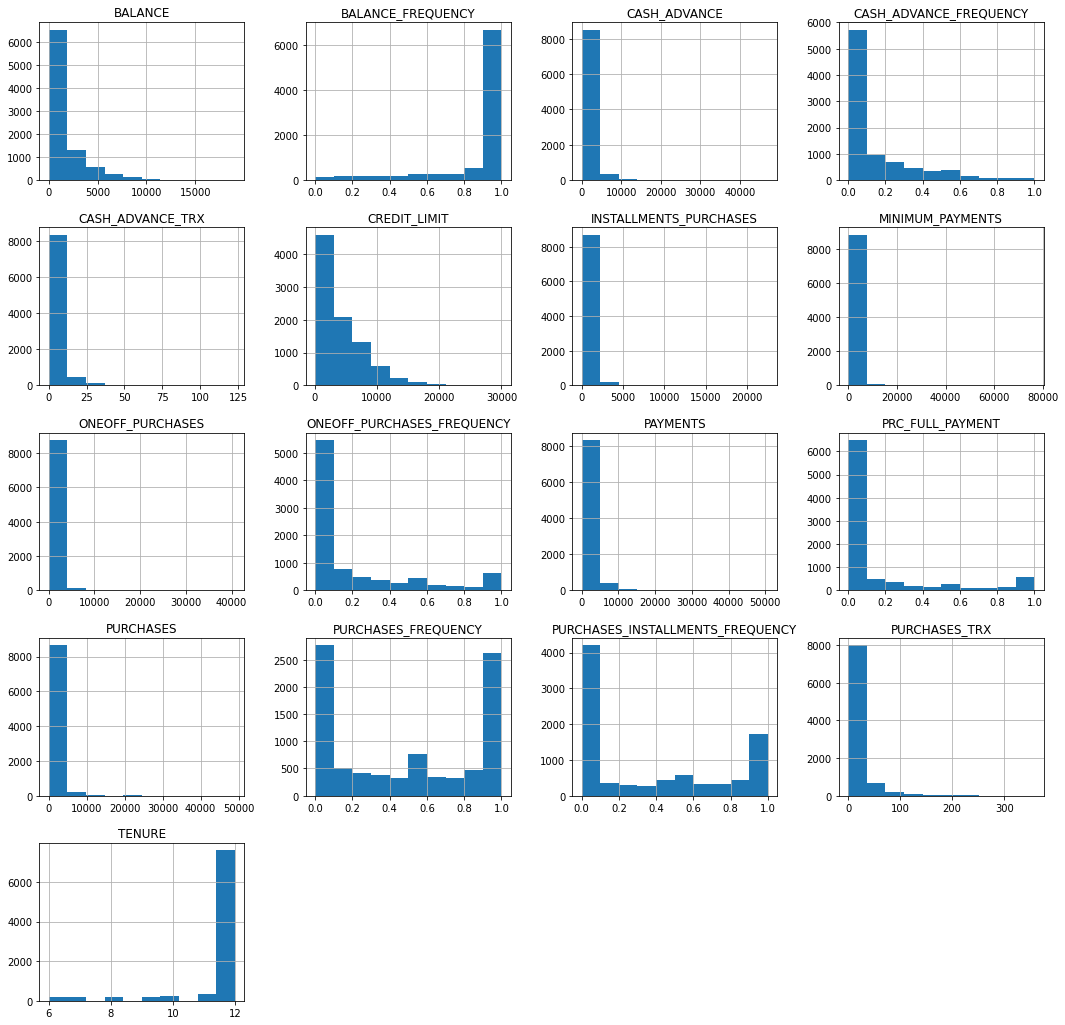

In [17]:
# Exploratory Data Analysis
credit.hist(figsize=(18,18));

# Box plot to check the outlier in dataset

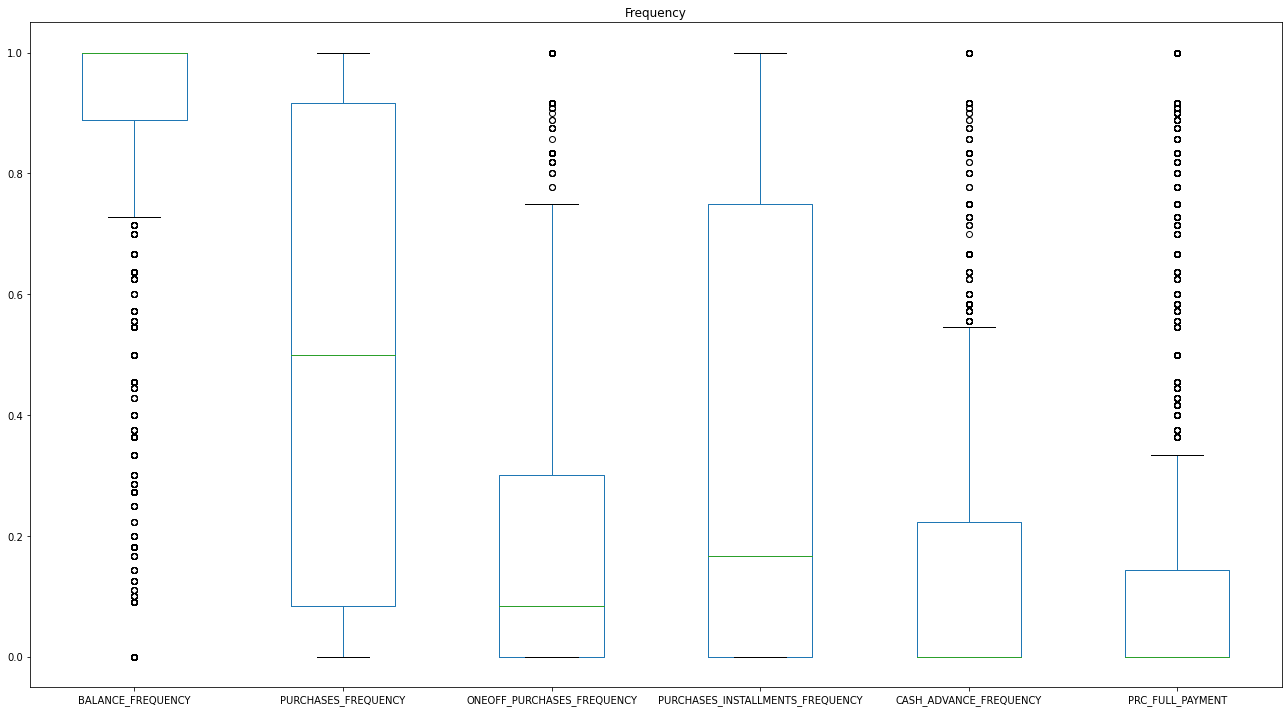

In [18]:
#let´s see how are distributed the frequency variables

credit[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()


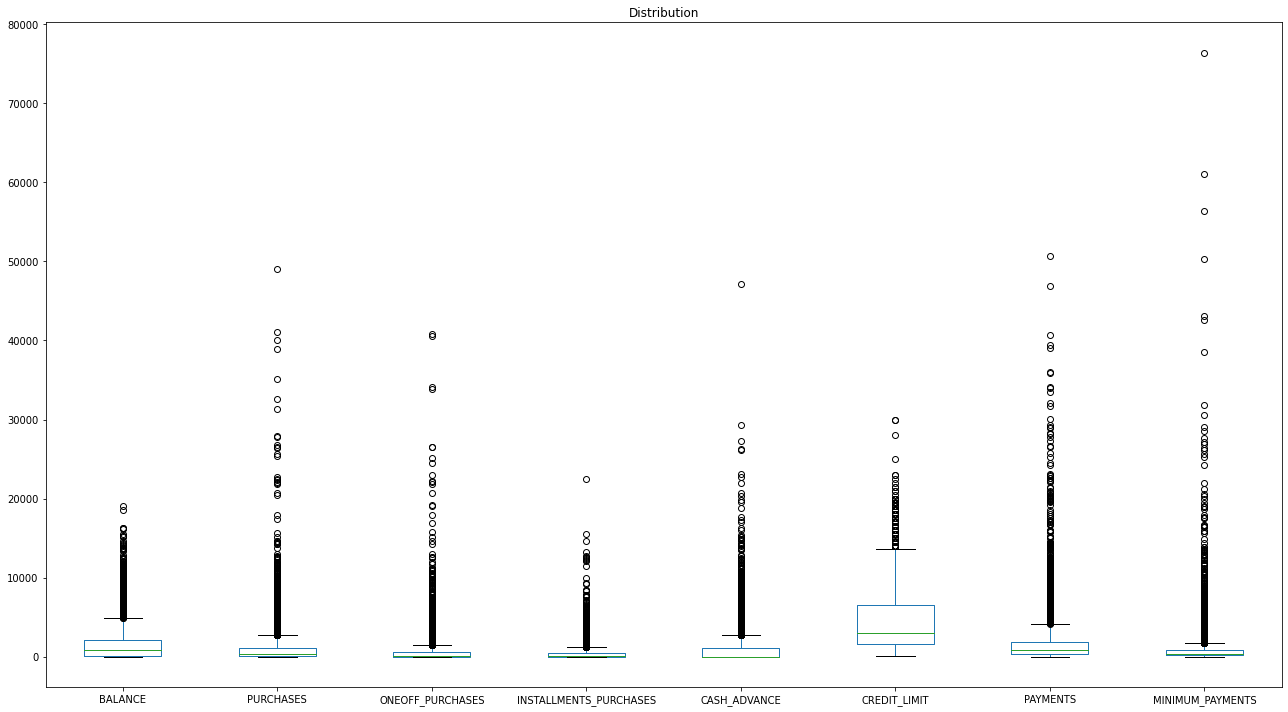

In [19]:
#let´s see how the numeric variables are distributed

credit[['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS'
]].plot.box(figsize=(18,10),title='Distribution',legend=True);
plt.tight_layout()

# There are also many outliers, but we will keep them for now

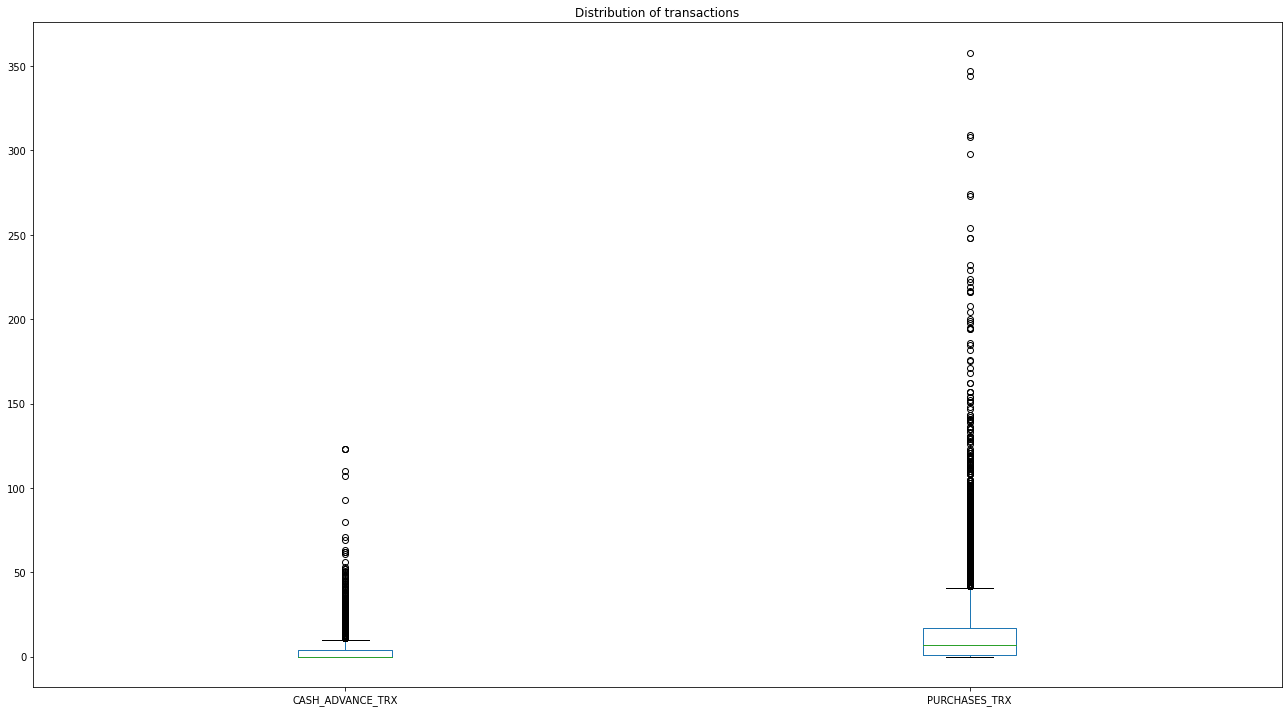

In [20]:
#let´s see how the numeric variables are distributed

credit[[ 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX'
]].plot.box(figsize=(18,10),title='Distribution of transactions',legend=True);
plt.tight_layout()

### Deriving New KPI

***1. Monthly average purchase and cash advance amount***

#### Monthly_avg_purchase

In [21]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

#### Monthly_cash_advance Amount

In [22]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

####  Purchases by type (one-off, installments)

- To find what type of purchases customers are making on credit card

In [23]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


#### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [24]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 19)

In [25]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 19)

In [26]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 19)

In [27]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 19)

***As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour***

In [28]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [29]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [30]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

#### Limit_usage (balance to credit limit ratio ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [31]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

####  Payments to minimum payments ratio 

In [32]:
#PAYMENT_MINPAYMENT
#The where clause is being used to avoid div by zero error 
credit['payment_minpayment'] = np.where(credit['MINIMUM_PAYMENTS']== 0, credit['PAYMENTS'], 
                                        credit['PAYMENTS']/credit['MINIMUM_PAYMENTS'])

In [33]:
credit['payment_minpayment'].describe()

count    8950.000000
mean        9.067416
std       118.176255
min         0.000000
25%         0.918910
50%         2.050782
75%         6.085788
max      6840.528861
Name: payment_minpayment, dtype: float64

In [ ]:
credit.shape

(8950, 22)


####  Avg Amount per cash advance transaction is equivalent to CASH_ADVANCE_TRX 
####  Avg Amount per purchase is equivalent to AVERAGE_PURCHASE_TRX


# Getting Insights from newly dervived KPI's

#### Average payment_minpayment ratio for each purchse type.

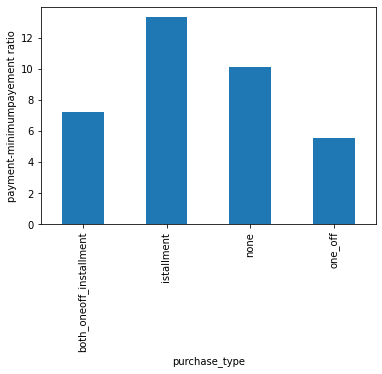

In [34]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpayment'])).plot.bar()
plt.ylabel('payment-minimumpayement ratio')
plt.show()

Insights : Customers with installments have highest payment-minimum payement ratio

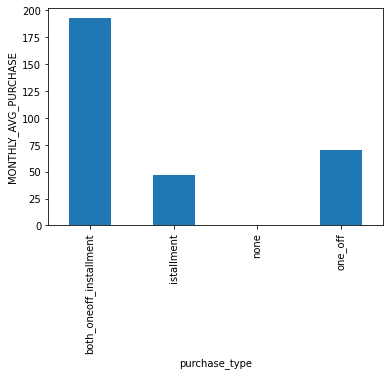

In [35]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_avg_purchase'])).plot.bar()
plt.ylabel('MONTHLY_AVG_PURCHASE')
plt.show()

Insights : Customers with one off and installments do most monthly purchase

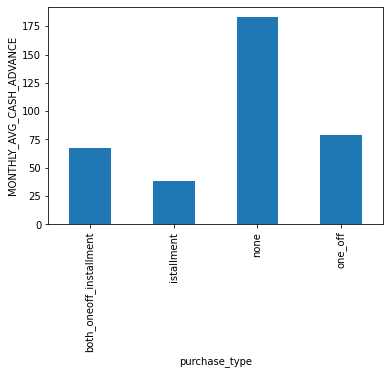

In [36]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.bar()
plt.ylabel('MONTHLY_AVG_CASH_ADVANCE')
plt.show()

Insights : Customers with no one off and installments take more monthly cash advance

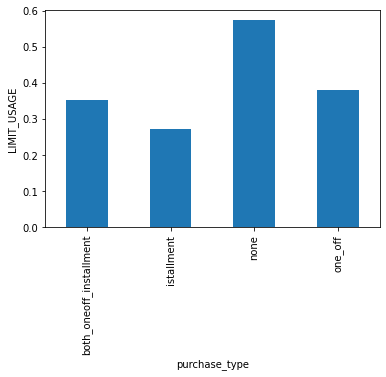

In [37]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.bar()
plt.ylabel('LIMIT_USAGE')
plt.show()

Insights : Customers with no one off and installments have highest limit usage

# Insights
- Customers with installments have highest payment-minimum payement ratio
- Customers with one off and installments do most monthly purchases
- Customers with no one off and installments take more monthly cash advance
- Customers with no one off and installments have highest limit usage

####  Extreme value Treatment
- Since there are variables having extreme values so I am doing log-transformation on the dataset to remove outlier effect and make the data normally distributed 

In [38]:
cr_log=credit.drop(['purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [39]:
cr_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.996774,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360


In [40]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113432,0.817570,1.894731,8.094806,6.624540,5.896738,0.117730,2.519680,3.050877,2.163970,0.296081,1.361780
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156385,1.009316,1.373856,0.819633,1.591763,1.200316,0.211617,0.130367,2.002823,2.429741,0.250303,0.938991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.119191,0.000000,2.564949,1.481458,0.000000,0.040656,0.651757
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.710413,0.000000,2.564949,3.494587,0.000000,0.264455,1.115398
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.691357,0.133531,2.564949,4.587295,4.606022,0.540911,1.958091
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.693147,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [41]:
cr_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.996774,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360


In [42]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

#### Original dataset with categorical column converted to number type.

***We do have some categorical data which need to convert with the help of dummy creation***

In [43]:
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)


In [44]:
cre_original.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpayment,both_oneoff_installment,istallment,none,one_off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,istallment,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,one_off,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,401.129252,0.000000,12.0,124.916667,17.149001,one_off,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,one_off,0.681429,2.771075,0,0,0,1


In [45]:
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'], prefix='purchase_type')

,purchase_type_both_oneoff_installment,purchase_type_istallment,purchase_type_none,purchase_type_one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


In [46]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'], prefix='purchase_type')],axis=1)

In [47]:
cr_dummy=cr_dummy.drop('purchase_type',axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                        False
ONEOFF_PURCHASES                         False
INSTALLMENTS_PURCHASES                   False
PURCHASES_FREQUENCY                      False
ONEOFF_PURCHASES_FREQUENCY               False
PURCHASES_INSTALLMENTS_FREQUENCY         False
CASH_ADVANCE_FREQUENCY                   False
CASH_ADVANCE_TRX                         False
PURCHASES_TRX                            False
PRC_FULL_PAYMENT                         False
Monthly_avg_purchase                     False
Monthly_cash_advance                     False
limit_usage                              False
payment_minpayment                       False
purchase_type_both_oneoff_installment    False
purchase_type_istallment                 False
purchase_type_none                       False
purchase_type_one_off                    False
dtype: bool

 2. Data Manipulation

#### B. Checking for multicollinearity

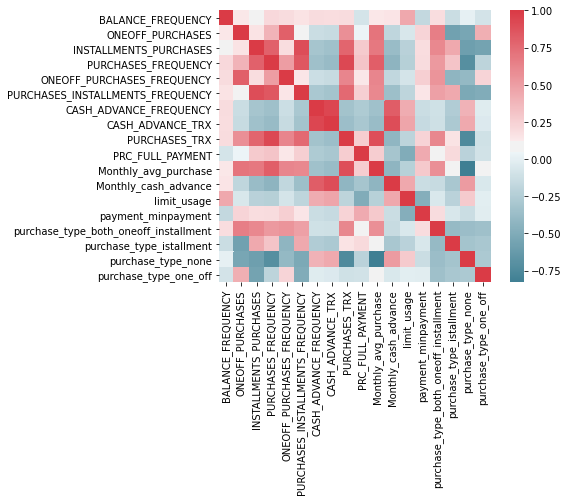

In [48]:
##Correlation analysis
#Correlation plot
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
credit_new_corr=cr_dummy.corr()

#Plot using seaborn library
sns.heatmap(credit_new_corr, mask=np.zeros_like(credit_new_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [49]:
col=['ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY','PURCHASES_TRX','CASH_ADVANCE_TRX']
cr_dummy=cr_dummy[[x for x in cr_dummy.columns if x not in col ]]

In [50]:
cr_dummy=pd.DataFrame(cr_dummy)
cr_dummy.shape

(8950, 12)

### C. Standardizing the data

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc=StandardScaler()

In [53]:
cr_scaled = sc.fit_transform(cr_dummy)

In [54]:
cnames=cr_dummy.columns

In [55]:
cr_scaled_df=pd.DataFrame(cr_scaled,columns=cnames)
cr_scaled_df.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PRC_FULL_PAYMENT,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment,purchase_type_both_oneoff_installment,purchase_type_istallment,purchase_type_none,purchase_type_one_off
0,-0.148757,-0.987090,0.394480,-0.556368,-0.429030,-0.890667,-1.022797,-0.497496,-0.670193,1.720516,-0.543690,-0.514625
1,0.179616,-0.987090,-1.087454,0.391958,-1.523373,1.697282,0.322181,0.226094,-0.670193,-0.581221,1.839282,-0.514625
2,0.492710,1.062022,-1.087454,-0.556368,0.564294,-0.890667,-0.035496,-0.716554,-0.670193,-0.581221,-0.543690,1.943162
3,-0.857867,1.265778,-1.087454,-0.556368,0.891164,0.302372,-0.381199,-1.450340,-0.670193,-0.581221,-0.543690,1.943162
4,0.492710,-0.114307,-1.087454,-0.556368,-1.100298,-0.890667,0.893219,-0.036658,-0.670193,-0.581221,-0.543690,1.943162


### Applying PCA

**With the help of principal component analysis we will reduce features**

In [56]:
from sklearn.decomposition import PCA

In [57]:
cr_scaled_df.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PRC_FULL_PAYMENT,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment,purchase_type_both_oneoff_installment,purchase_type_istallment,purchase_type_none,purchase_type_one_off
0,-0.148757,-0.987090,0.394480,-0.556368,-0.429030,-0.890667,-1.022797,-0.497496,-0.670193,1.720516,-0.543690,-0.514625
1,0.179616,-0.987090,-1.087454,0.391958,-1.523373,1.697282,0.322181,0.226094,-0.670193,-0.581221,1.839282,-0.514625
2,0.492710,1.062022,-1.087454,-0.556368,0.564294,-0.890667,-0.035496,-0.716554,-0.670193,-0.581221,-0.543690,1.943162
3,-0.857867,1.265778,-1.087454,-0.556368,0.891164,0.302372,-0.381199,-1.450340,-0.670193,-0.581221,-0.543690,1.943162
4,0.492710,-0.114307,-1.087454,-0.556368,-1.100298,-0.890667,0.893219,-0.036658,-0.670193,-0.581221,-0.543690,1.943162


In [58]:
#We have 17 features so our n_component will be 132
pc=PCA(n_components=12)
cr_pca=pc.fit(cr_scaled)

In [59]:
#Lets check if we will take 12 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

1.0000000000000002

In [60]:
var_ratio={}
for n in range(2,13):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [61]:
var_ratio

{2: 0.5249204020778665,
 3: 0.6807419836429277,
 4: 0.7986318827690105,
 5: 0.8700582258439936,
 6: 0.9215094915232397,
 7: 0.9584872235772025,
 8: 0.9854385343270677,
 9: 0.9956538883029201,
 10: 0.9991707003348479,
 11: 1.0000000000000002,
 12: 1.0000000000000002}

#### Performing Factor Analysis

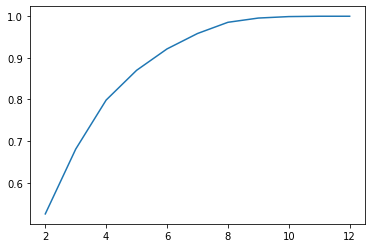

In [62]:
pd.Series(var_ratio).plot()


In [63]:
pc_final=PCA(n_components=5).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [64]:
dd=pd.DataFrame(reduced_cr)
reduced_cr.shape

(8950, 5)

In [65]:
dd.head()

,0,1,2,3,4
0,0.090159,2.155645,-0.421662,-1.215289,0.493442
1,-2.896251,0.269180,-0.050878,1.716656,-0.709221
2,0.071433,-1.524568,1.731207,-1.765969,-0.322670
3,-0.152140,-1.476231,2.048772,-1.697159,0.697007
4,-1.130187,-0.952031,1.433841,-1.390550,-0.559941


***So initially we had 17 variables now its 5 so our variable go reduced***

In [66]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=cnames)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,-0.006282,-0.284032,-0.377648,-0.088859,-0.694155
ONEOFF_PURCHASES,0.309332,-0.476156,0.181170,0.026412,0.054112
INSTALLMENTS_PURCHASES,0.387217,0.143763,-0.417634,0.000190,0.090263
PRC_FULL_PAYMENT,0.236404,0.265579,0.144951,0.278382,-0.530399
Monthly_avg_purchase,0.456563,-0.150050,-0.038773,-0.160523,-0.073336
Monthly_cash_advance,-0.306719,-0.195282,-0.128531,0.238935,-0.113457
limit_usage,-0.247192,-0.323452,-0.341081,-0.211458,-0.135023
payment_minpayment,0.223295,0.092727,0.247059,0.493705,-0.250473
purchase_type_both_oneoff_installment,0.324530,-0.300247,-0.269057,0.308467,0.280363
purchase_type_istallment,0.077792,0.522579,-0.191329,-0.371258,-0.113905


In [67]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.326925
PC_1    0.197995
PC_2    0.155822
PC_3    0.117890
PC_4    0.071426
dtype: float64

### Cluster Analysis

### Choosing number clusters using Pseudo F-value (elbow method)

In [68]:
#Load required libraries
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(reduced_cr)
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

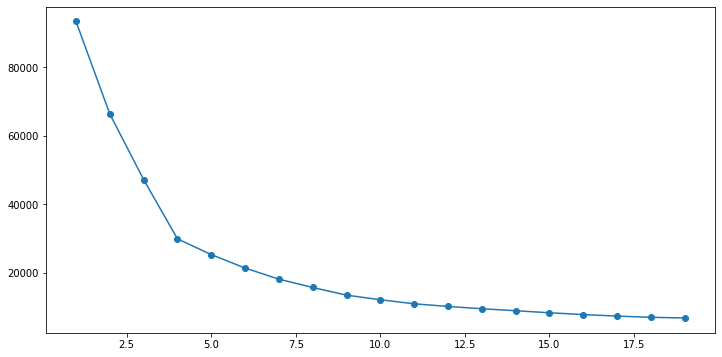

In [69]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4. So, optimal number of clusters could be 4. 

### Choosing number clusters using Silhouette Coefficient (SC)

In [70]:
from sklearn import metrics

In [71]:
# calculate SC for K=2 to K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=100)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

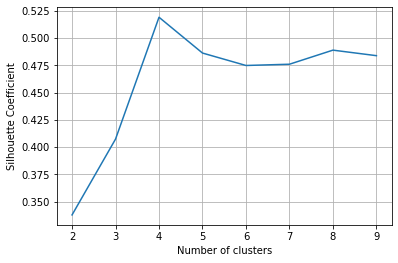

In [72]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### Note

The solution can be 4 based on the SC score. If we take highest SC score, 4 segment solution is best

### CALCULATING K-MEANS AND THE CENTROIDS

In [73]:
# It seems that the optimal number of clusters is 4.
# I am going to take 4 for the analysis
km_4=KMeans(n_clusters=4,random_state=123)

In [74]:
# applying kmeans
km_4.fit(reduced_cr)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [75]:
pd.Series(km_4.labels_).value_counts()

3    2774
0    2259
1    2043
2    1874
dtype: int64

### ADDING THE LABELS TO THE DATASET

In [76]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])

In [77]:
df_pair_plot['Cluster']=km_4.labels_ 

In [78]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,Cluster
0,0.090159,2.155645,-0.421662,-1.215289,0.493442,0
1,-2.896251,0.269180,-0.050878,1.716656,-0.709221,1
2,0.071433,-1.524568,1.731207,-1.765969,-0.322670,2
3,-0.152140,-1.476231,2.048772,-1.697159,0.697007,2
4,-1.130187,-0.952031,1.433841,-1.390550,-0.559941,2


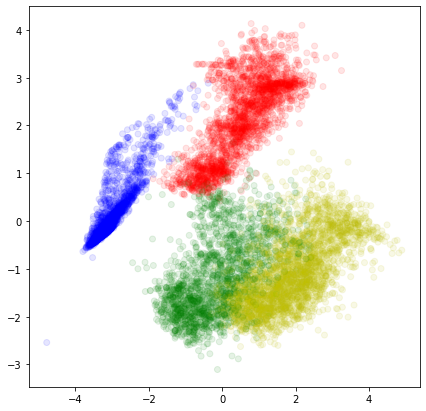

In [79]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

PC0 and PC1 are able to distinguish the cluster clearly

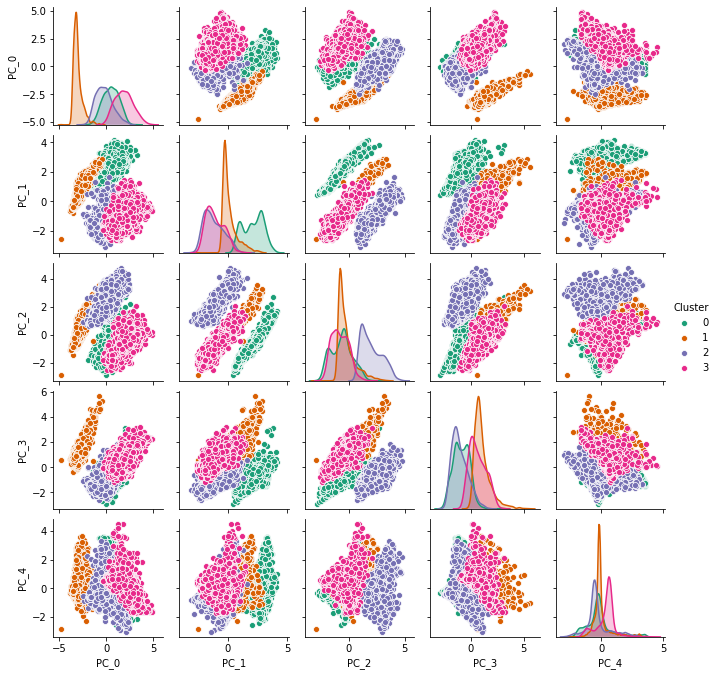

In [80]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',height=1.85)

### CLUSTERS EXPLANATION AND MARKETING STRATEGY

In [81]:
#Key performance variable selection . here I am taking variables which we will use in deriving new KPI.
#We can take all 17 variables but it will be difficult to interpret. So, we are selecting less no of variables.

col_kpi=['PURCHASES_TRX','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpayment','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']

In [82]:
cre_original.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment,both_oneoff_installment,istallment,none,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.134972,3.248827,14.709832,4494.229961,1733.143852,854.168374,0.153715,11.517318,86.175173,88.977984,0.388884,9.067416,0.309944,0.252514,0.228156,0.209385
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.199257,6.824647,24.857649,3638.671660,2895.063757,2353.918049,0.292499,1.338331,180.508787,193.136115,0.389721,118.176255,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,166.200074,0.000000,12.000000,3.399375,0.000000,0.041494,0.918910,0.000000,0.000000,0.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,300.995873,0.000000,12.000000,31.936667,0.000000,0.302720,2.050782,0.000000,0.000000,0.000000,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,804.414788,0.142857,12.000000,97.228333,99.085196,0.717571,6.085788,1.000000,1.000000,0.000000,0.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861,1.000000,1.000000,1.000000,1.000000


In [83]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [84]:
cluster_df_4.head()

,PURCHASES_TRX,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpayment,both_oneoff_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2.0,0.00,95.4,7.950000,0.000000,0.040901,0.0,1.446508,0,1,0,0,1000.0,0
1,0.0,0.00,0.0,0.000000,536.912124,0.457495,4.0,3.826241,0,0,0,1,7000.0,1
2,12.0,773.17,0.0,64.430833,0.000000,0.332687,0.0,0.991682,0,0,1,0,7500.0,2
3,1.0,1499.00,0.0,124.916667,17.149001,0.222223,1.0,0.000000,0,0,1,0,7500.0,2
4,1.0,16.00,0.0,1.333333,0.000000,0.681429,0.0,2.771075,0,0,1,0,1200.0,2


In [85]:
# Mean value gives a good indication of the distribution of data. 
#So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,11.904825,0.002937,7.109925,32.959625
ONEOFF_PURCHASES,0.000000,0.000000,786.827679,1379.884427
INSTALLMENTS_PURCHASES,538.114608,0.002173,0.000000,888.049776
Monthly_avg_purchase,46.994978,0.000181,69.688958,192.685172
Monthly_cash_advance,37.682472,183.578865,78.995966,67.821985
limit_usage,0.271618,0.573691,0.381074,0.353548
CASH_ADVANCE_TRX,1.261178,6.302007,2.932231,2.832733
payment_minpayment,13.300288,10.100468,5.542470,7.240871
both_oneoff_installment,0.000000,0.000000,0.000000,1.000000
istallment,1.000000,0.000489,0.000000,0.000000


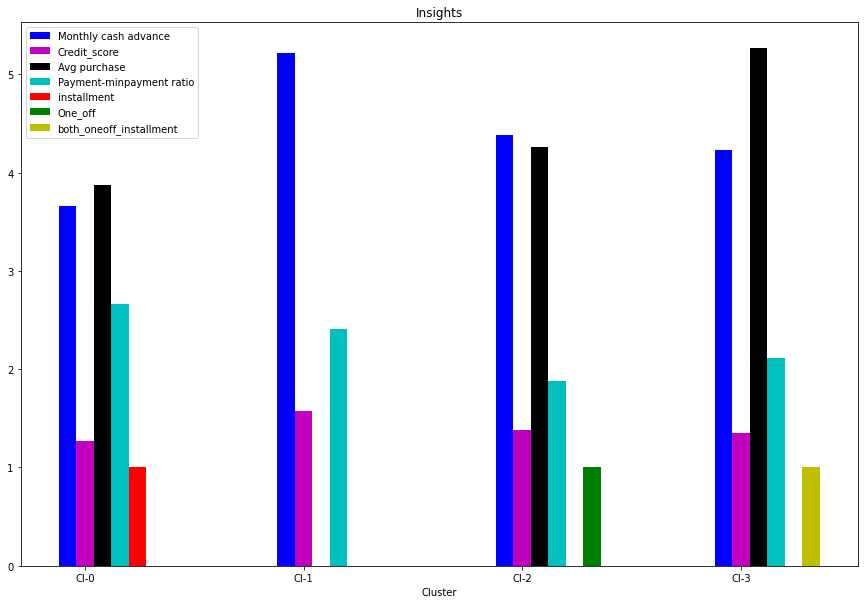

In [86]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values+1)
credit_score=(cluster_4.loc['limit_usage',:].values+1)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values+1)
payment=np.log(cluster_4.loc['payment_minpayment',:].values+1)
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values
both=cluster_4.loc['both_oneoff_installment',:].values



bar_width=.08
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off',width=bar_width)
b6=plt.bar(index+5*bar_width,both,color='y',label='both_oneoff_installment',width=bar_width)


plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

***Insights with 4 Clusters***


- Cluster 0 customers are doing maximum Installments transactions, take least monthly cash advance, poor credit_score and highest payment minpayment ratio ***This group is about 25% of the total customer base***


- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and good credit_score & doing no purchase transaction. ***This group is about 23% of the total customer base***


- Cluster 2 is the group of customers who are doing maximum one off transactions, have comparatively good credit score and lowest payment minpayment ratio. ***This group is about 21% of the total customer base ***


- Cluster 3 customers who are doing both one off and Instllment transactions have good credit score and do maximum monthly purchase.*** This group is about 31% of the total customer base***

### Marketing Strategy Suggested:

#### a. Group 0
   - They are potential target customers who are paying dues and doing mostly installment purchases and have poor credit score)
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
#### b. Group 1
   - They have good credit score and taking only cash on advance. We can target them by providing less interest rate on Installment purchase transaction or cashback/discount on one off purchase transaction.
   
#### c. Group 2
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only).We can target them by providing less interest rate on Installment purchase transaction.
   
#### d. Group 3
  - This group is performing best among all as cutomers are maintaining good credit score, doing both one off and instalment purchase,highest monthly average purchase and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       

In [87]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 ",'\n')
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')


Cluster_4   
0          0    2259
1          1    2043
2          2    1874
3          3    2774
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0  2259   25.240223
1  2043   22.826816
2  1874   20.938547
3  2774   30.994413 

